In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(rc={"figure.dpi": 500})

# Single Assay

Count of >0.8
mfp: 589.0
fcfp: 596.0
maccs: 557.0
apfp: 626.0
ttfp: 625.0
gesim: 618.0


/tmp/ipykernel_3494663/3692575674.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
/tmp/ipykernel_3494663/3692575674.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


Text(0, 0.5, 'Count')

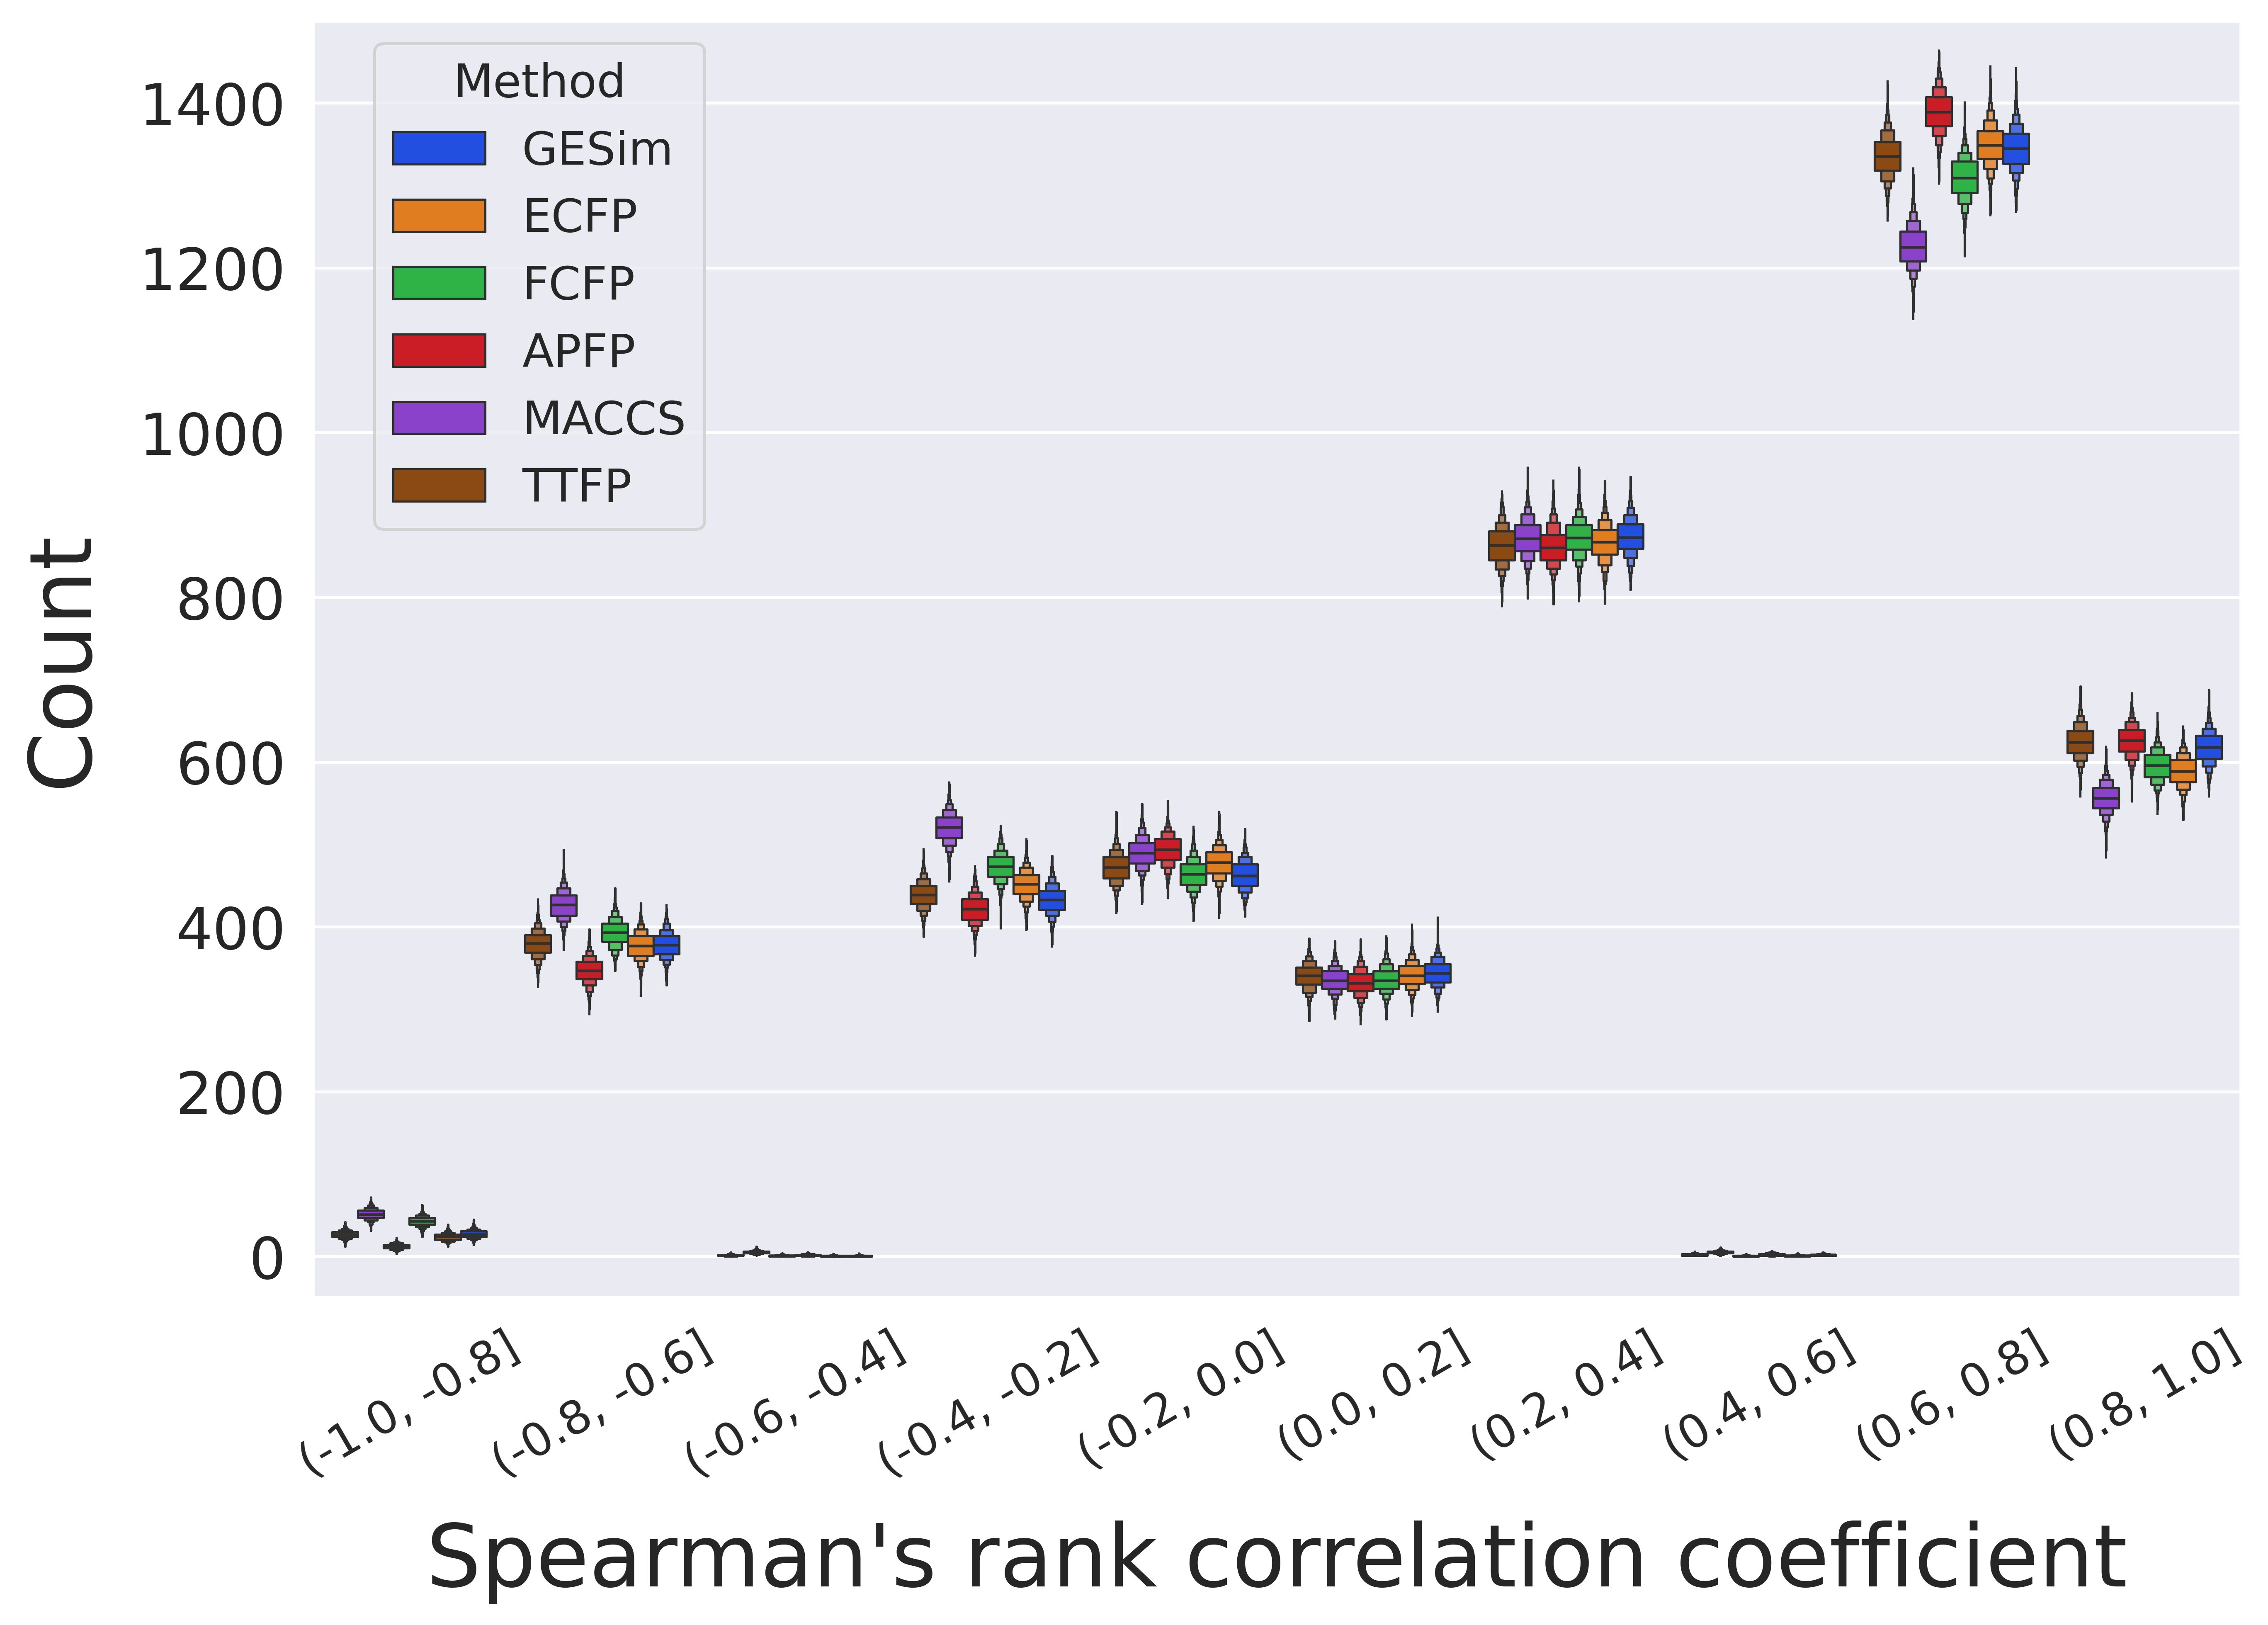

In [2]:
with open('result/similaritybenchmark/result_single_assay.pkl', 'rb') as f:
    result_dict = pickle.load(f)

print("Count of >0.8")
for k in result_dict.keys():
    df = pd.DataFrame(result_dict[k])
    corr_cnt = (df > 0.8).sum(axis=1).mean()
    print(f"{k}: {round(corr_cnt, 0)}")
    
    

bins = [round(i, 2) for i in np.linspace(-1, 1, 11)]
concat_list = []

method_list = ['ttfp', 'maccs', 'apfp', 'fcfp', 'mfp', 'gesim']  # To unify the colors of LBVS and SS benchmarks
rename_dict = {
    "ttfp": "TTFP",
    "maccs": "MACCS",
    "apfp": "APFP",
    "fcfp": "FCFP",
    "mfp": "ECFP",
    "gesim": "GESim",
}
for method_name in method_list:
#for method_name in result_dict.keys():
    for i in range(len(result_dict[method_name])):
        bin_count_df = pd.cut(result_dict[method_name][i], bins=bins).value_counts().rename_axis('bins').reset_index()
        bin_count_df['method'] = [rename_dict[method_name] for _ in range(bin_count_df.shape[0])]
        concat_list.append(bin_count_df)
df_vis = pd.concat(concat_list)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
sns.boxenplot(
    data=df_vis,
    x='bins',
    y="count",
    hue='method',
    ax=ax,
    #palette=sns.color_palette("muted")[:6][::-1],
    palette=sns.color_palette("bright")[:6][::-1],
    dodge=0.6,
    k_depth='full',
    width=0.8,
)
ax.set_ylim([-50, 1500])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Method", loc='upper left', bbox_to_anchor=(0.02, 1.), fontsize=16, title_fontsize=16, frameon=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
ax.set_xlabel("Spearman's rank correlation coefficient", fontsize=30, labelpad=12)
ax.set_ylabel("Count", fontsize=30, labelpad=12)

#fig = plt.figure(figsize=(12, 8))
#ax = fig.add_subplot(1, 1, 1)
#sns.pointplot(data=df_vis, x='bins', y="count", hue='method', ax=ax, errorbar='sd', errwidth=2,
#              palette=sns.color_palette("muted")[:6][::-1], dodge=0.35, markersize=6)
#ax.set_ylim([-50, 1500])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title="Method", loc='upper left', bbox_to_anchor=(0.02, 1.), fontsize=18, title_fontsize=18, frameon=True)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
#ax.set_xlabel("Spearman's rank correlation coefficient", fontsize=30, labelpad=12)
#ax.set_ylabel("Count", fontsize=30, labelpad=12)

In [4]:
summary_df = df_vis.groupby(['bins', 'method']).agg(
    mean_count=('count', 'mean'),
    std_count=('count', 'std')
).reset_index()
summary_df

/tmp/ipykernel_1843895/1417438283.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df_vis.groupby(['bins', 'method']).agg(


,bins,method,mean_count,std_count
0,"(-1.0, -0.8]",APFP,12.128,3.254567
1,"(-1.0, -0.8]",ECFP,23.729,4.631740
2,"(-1.0, -0.8]",FCFP,42.653,6.085690
3,"(-1.0, -0.8]",GESim,27.433,4.923388
4,"(-1.0, -0.8]",MACCS,51.430,6.537878
5,"(-1.0, -0.8]",TTFP,26.858,4.667936
6,"(-0.8, -0.6]",APFP,346.935,15.986129
7,"(-0.8, -0.6]",ECFP,377.259,16.808821
8,"(-0.8, -0.6]",FCFP,392.910,17.081325
9,"(-0.8, -0.6]",GESim,378.578,15.999685


# Multi Assay

Count of >0.8
mfp: 1061.0
fcfp: 1023.0
maccs: 913.0
apfp: 974.0
ttfp: 1055.0
gesim: 1018.0


/tmp/ipykernel_3494663/191875890.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
/tmp/ipykernel_3494663/191875890.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


Text(0, 0.5, 'Count')

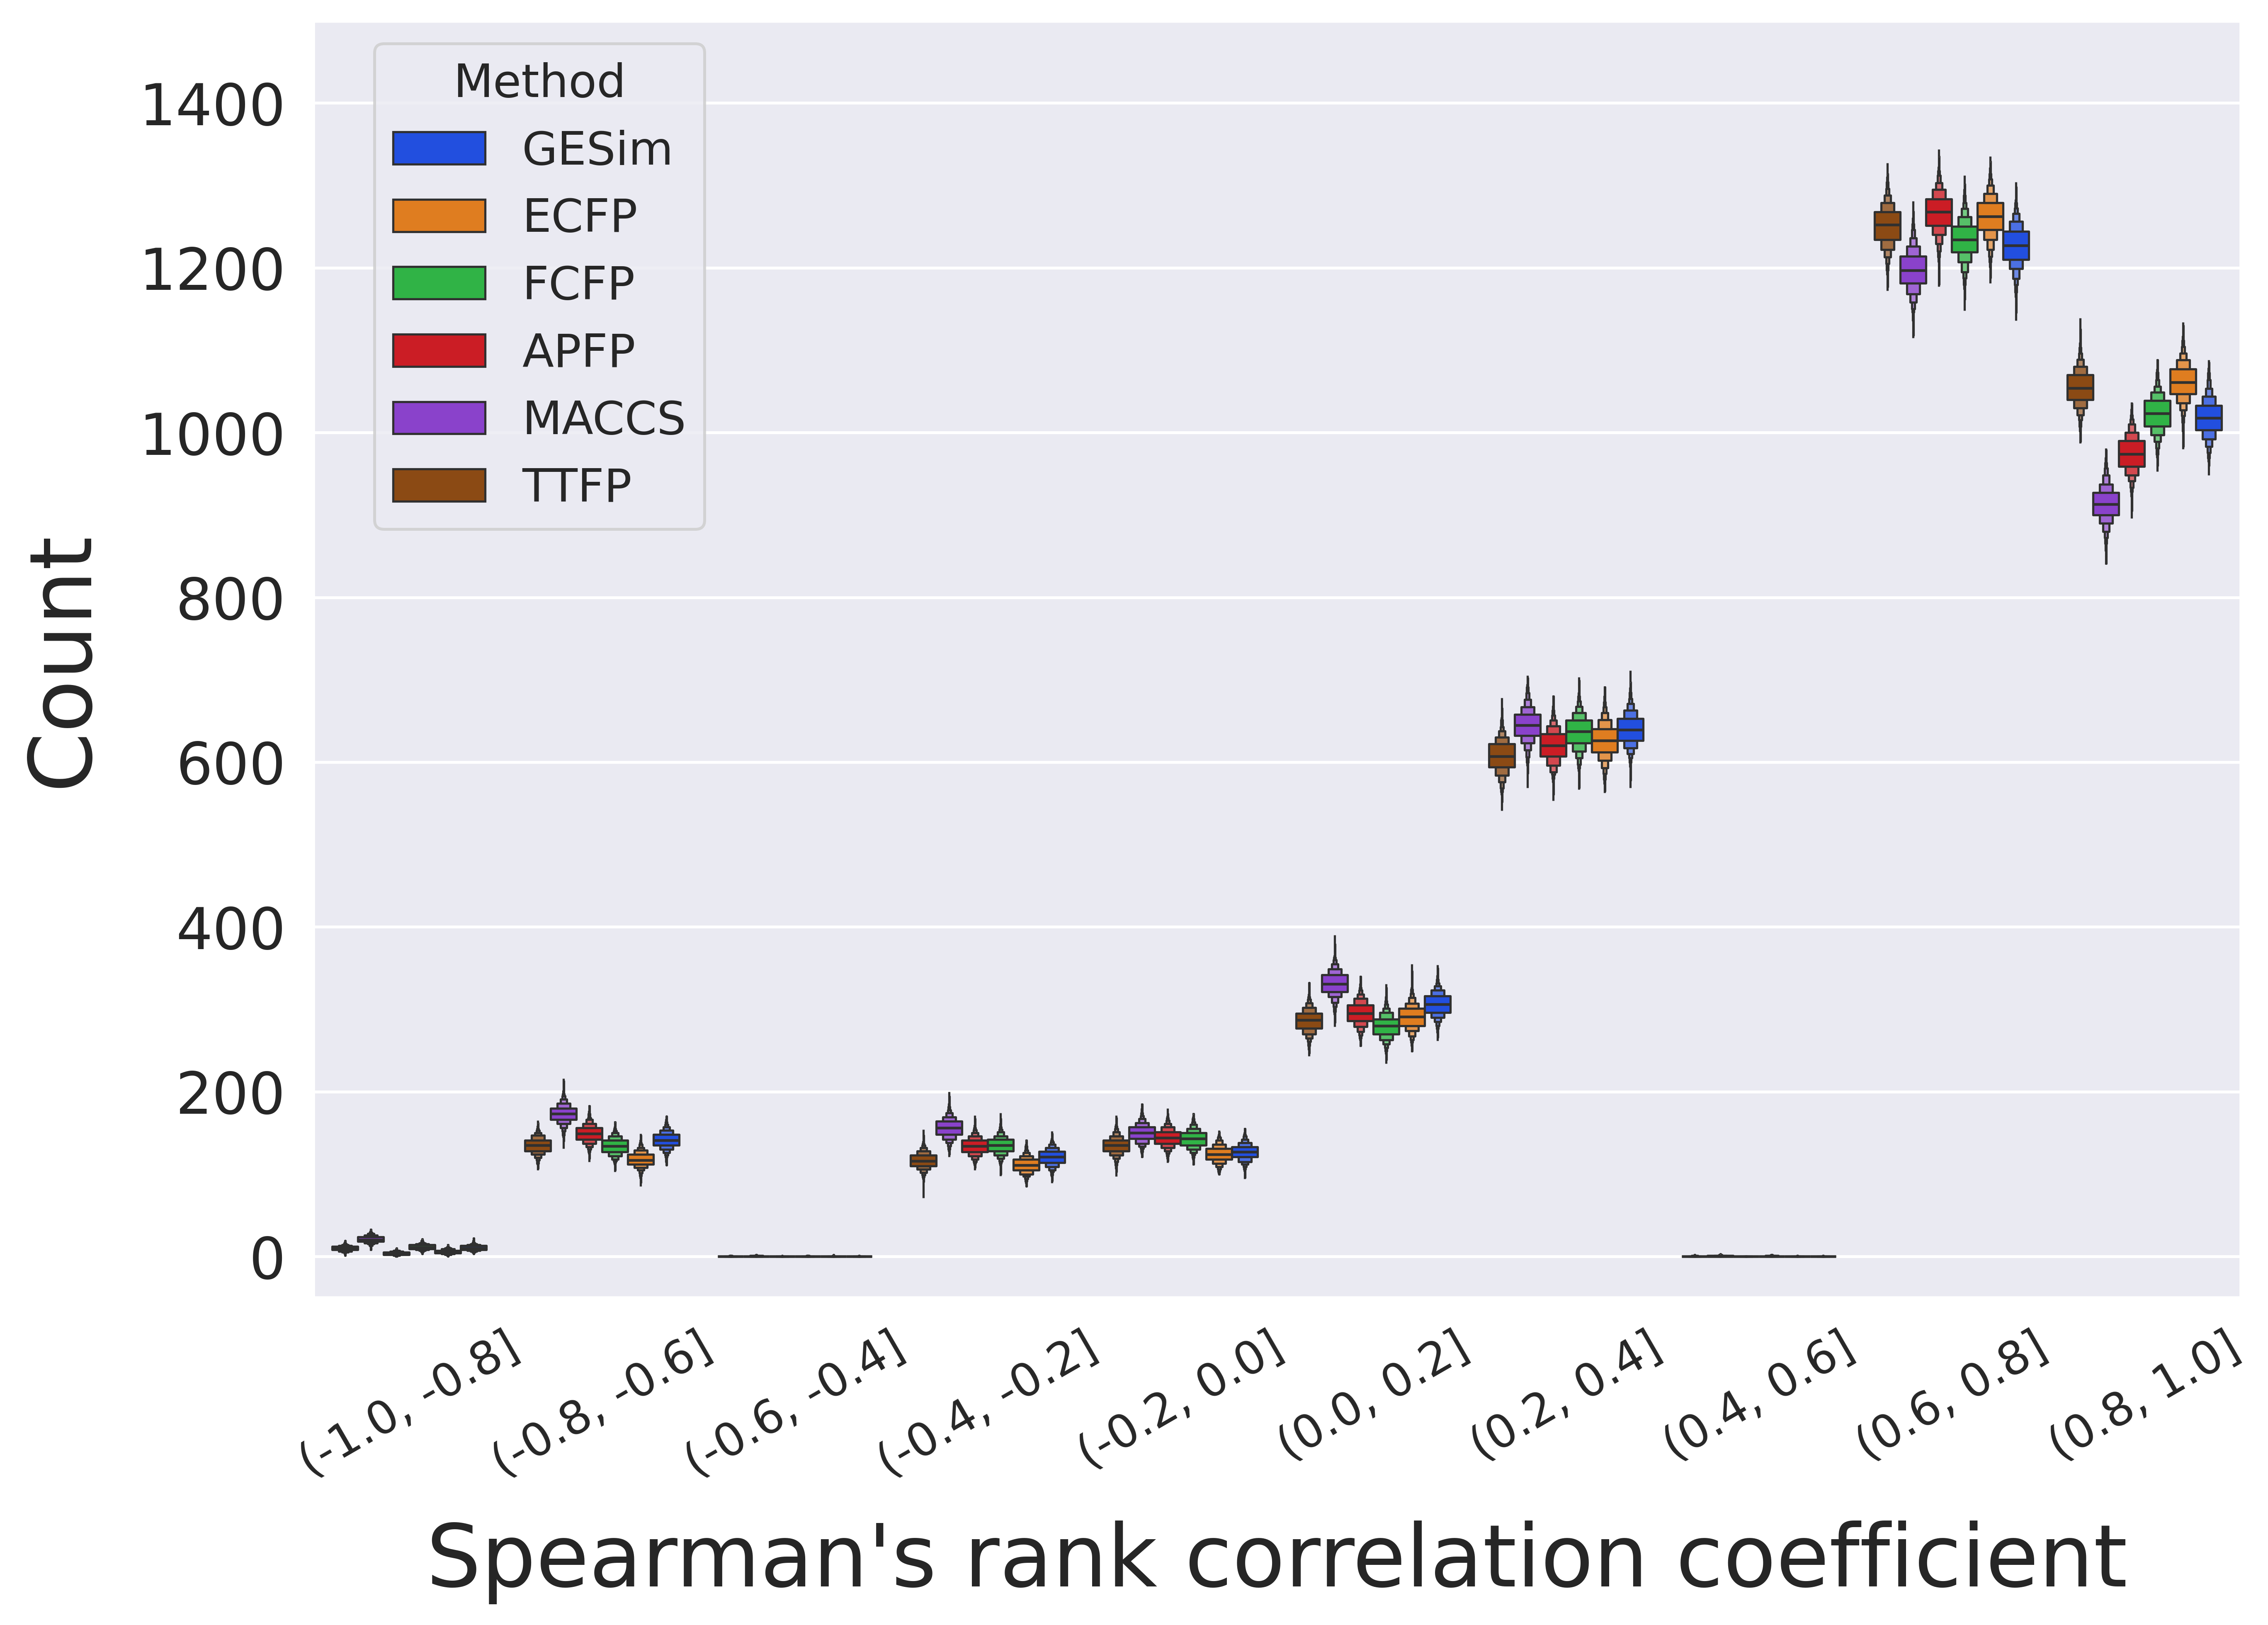

In [3]:
with open('result/similaritybenchmark/result_multi_assay.pkl', 'rb') as f:
    result_dict = pickle.load(f)

print("Count of >0.8")
for k in result_dict.keys():
    df = pd.DataFrame(result_dict[k])
    corr_cnt = (df > 0.8).sum(axis=1).mean()
    print(f"{k}: {round(corr_cnt, 0)}")
    
    

bins = [round(i, 2) for i in np.linspace(-1, 1, 11)]
concat_list = []

method_list = ['ttfp', 'maccs', 'apfp', 'fcfp', 'mfp', 'gesim']  # To unify the colors of LBVS and SS benchmarks
rename_dict = {
    "ttfp": "TTFP",
    "maccs": "MACCS",
    "apfp": "APFP",
    "fcfp": "FCFP",
    "mfp": "ECFP",
    "gesim": "GESim",
}
for method_name in method_list:
#for method_name in result_dict.keys():
    for i in range(len(result_dict[method_name])):
        bin_count_df = pd.cut(result_dict[method_name][i], bins=bins).value_counts().rename_axis('bins').reset_index()
        bin_count_df['method'] = [rename_dict[method_name] for _ in range(bin_count_df.shape[0])]
        concat_list.append(bin_count_df)
df_vis = pd.concat(concat_list)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
sns.boxenplot(
    data=df_vis,
    x='bins',
    y="count",
    hue='method',
    ax=ax,
    #palette=sns.color_palette("muted")[:6][::-1],
    palette=sns.color_palette("bright")[:6][::-1],
    dodge=0.6,
    k_depth='full',
    width=0.8,
)
ax.set_ylim([-50, 1500])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Method", loc='upper left', bbox_to_anchor=(0.02, 1.), fontsize=16, title_fontsize=16, frameon=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
ax.set_xlabel("Spearman's rank correlation coefficient", fontsize=30, labelpad=12)
ax.set_ylabel("Count", fontsize=30, labelpad=12)

#fig = plt.figure(figsize=(12, 8))
#ax = fig.add_subplot(1, 1, 1)
#sns.pointplot(data=df_vis, x='bins', y="count", hue='method', ax=ax, errorbar='sd', errwidth=2,
#              palette=sns.color_palette("muted")[:6][::-1], dodge=0.35, markersize=6)
#ax.set_ylim([-50, 1500])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title="Method", loc='upper left', bbox_to_anchor=(0.02, 1.), fontsize=18, title_fontsize=18, frameon=True)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
#ax.set_xlabel("Spearman's rank correlation coefficient", fontsize=30, labelpad=12)
#ax.set_ylabel("Count", fontsize=30, labelpad=12)